# Module 5: Computer Vision Using Deep Learning
In this example, we will use the Fashion-MNIST clothing dataset which is a standard dataset in computer vision and deep learning.There are 60,000 small square 28×28 pixel grayscale images of of clothing, such as shoes and t-shirts. Below is the mapping of all 10 type of clothing in this dataset:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

In [1]:
from numpy import mean
import tensorflow
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D 
from matplotlib import pyplot as plt
import numpy as np

### Loading the dataset
The fashion dataset is includeded in keras datasetsand can be loaded easily.

In [2]:
(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()

There are 60,000 image sin the train and 10,000 in the validation set.

In [3]:
print(X_train.shape)
print(X_valid.shape)

(60000, 28, 28)
(10000, 28, 28)


Let's plot the first few items from this dataset:

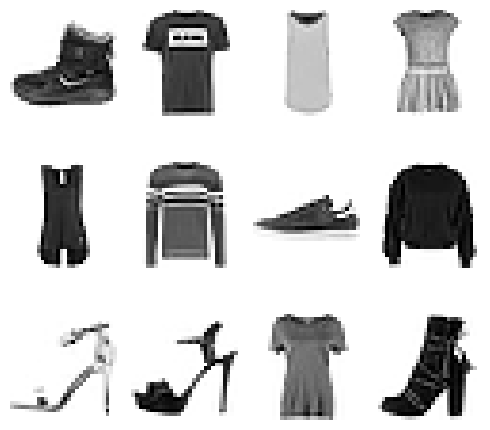

In [4]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()


### One-hot Encoding of the Labels
Usually, we use a one-hot encoding for categorical variables with. no ordinal relationship.It converts each categorical value into a binary vector of zeros and ones, in which all the values are zero, except the index for that value which is marked as 1.

In [5]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

### Normalize the Pixel Values

The pixel values in the dataset are integers between 0 and 255, we will rescale them to the range 0-1. To do this, T we will convert the data type from unsigned integers to floats, then divide by the maximum value (255). normalizing values between zero and one. Normalizing input values is recommened in neural networks, it helps the model to converge faster.


In [6]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')
X_train /= 255
X_valid /= 255

### Define the model
we will define a CNN model here with two layesrs of convolution, followed by a maxpooling and dropout, followed by a flatten layer, and then a dense layer of 128 units with a dropout, and finally a softmax layer. In the final softmax layer, we have ten softmax units (equal to the number of the classes in the dataset).

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

2023-04-06 15:57:10.663752: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### Train the Model
We will use the categorical_crossentropy metric as the index for loss because we have a classification task. We will train for 10 epochs.

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
1875/1875 [==============================] - 189s 100ms/step - loss: 0.4750 - accuracy: 0.8317 - val_loss: 0.3127 - val_accuracy: 0.8856
Epoch 2/10
1875/1875 [==============================] - 207s 111ms/step - loss: 0.3159 - accuracy: 0.8880 - val_loss: 0.2559 - val_accuracy: 0.9062
Epoch 3/10
1875/1875 [==============================] - 215s 114ms/step - loss: 0.2670 - accuracy: 0.9033 - val_loss: 0.2390 - val_accuracy: 0.9133
Epoch 4/10
1875/1875 [==============================] - 214s 114ms/step - loss: 0.2367 - accuracy: 0.9132 - val_loss: 0.2325 - val_accuracy: 0.9143
Epoch 5/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.2153 - accuracy: 0.9210 - val_loss: 0.2196 - val_accuracy: 0.9210
Epoch 6/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.1990 - accuracy: 0.9275 - val_loss: 0.2269 - val_accuracy: 0.9192
Epoch 7/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1814 - accuracy: 0.9327 - val_los

In [19]:
test_loss, test_acc = model.evaluate(X_valid, y_valid)
print("Test Loss:"+ str(test_loss))
print("Test Accuracy:"+str(test_acc))

313/313 [==============================] - 3s 9ms/step - loss: 0.2242 - accuracy: 0.9260
Test Loss:0.2242095023393631
Test Accuracy:0.9259999990463257


### Visualize the results

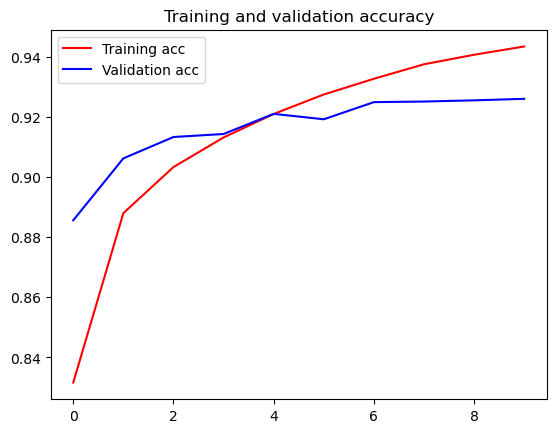

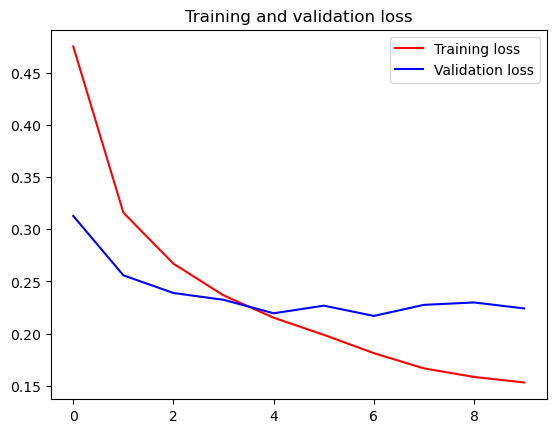

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Save the Model

In [21]:
model.save('final_model.h5')

### Make a Prediction
If we call the predict method to on an input image, it returns a vector of 10 probablities one for each class (what is the probablity that the inout image belongs to any of those 10 categories).

In [22]:
from keras.models import load_model

model = load_model('final_model.h5')
sample_img = X_valid[0].reshape(1, 28, 28, 1)
model.predict(sample_img)

array([[1.0789590e-14, 5.1532877e-19, 8.1591147e-16, 7.9360089e-16,
        2.1568501e-17, 5.0643739e-11, 5.9317008e-16, 6.2710804e-08,
        1.5246490e-15, 9.9999988e-01]], dtype=float32)

We can run the argmax function to get the class with the highest probably as the final category for the inPut:

In [23]:
 np.argmax(model.predict(sample_img), axis=-1)

array([9])

### Visualizing the Output of Different Layers

Below, we visualize the input as it goes through the first few layers of the neural network and how  the output of the convolution operator looks like. You can change the filter number to see how different convolution filters at each layer modify the image.

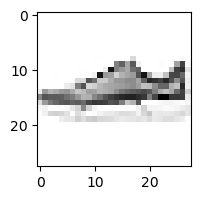

In [24]:
 
plt.figure(figsize=(2,2))
plt.imshow(X_valid[9], cmap='Greys')

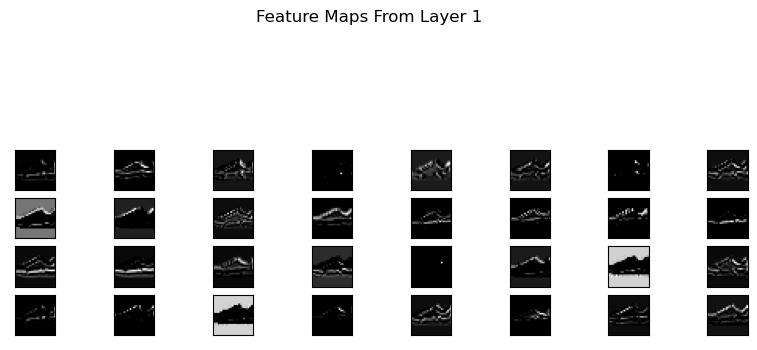

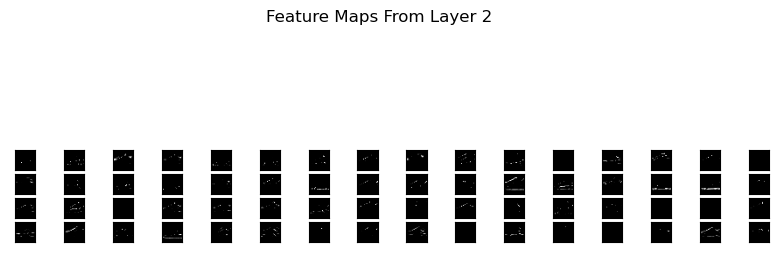

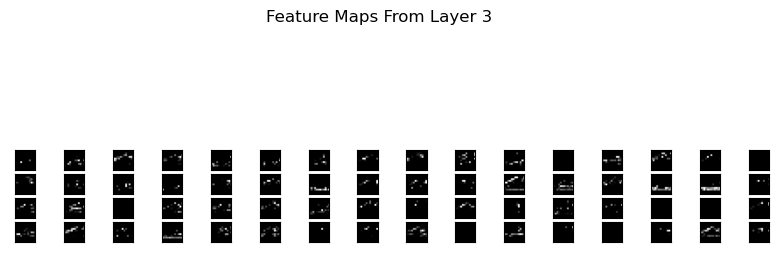

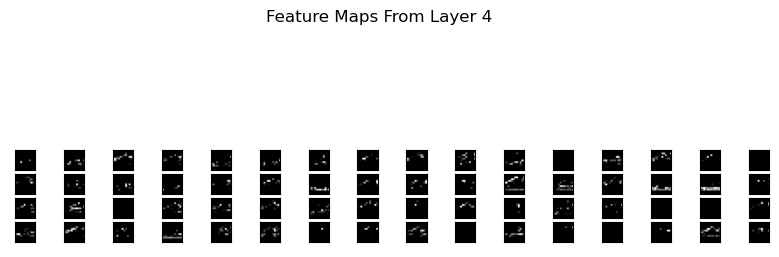

In [28]:
# conv_num = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tensorflow.keras.models.Model(inputs = model.input, outputs = layer_outputs)

kernels_count=[32,64,64,64]
for k in range(0,4):
    kernels_cnt=kernels_count[k]
    feature_maps = activation_model.predict(X_valid[9].reshape(1, 28, 28, 1))[k]    
    ix = 1
    plt.figure(figsize=(10,20))
    plt.suptitle(f'Feature Maps From Layer {k+1}',y=0.95)
    for _ in range(4):
        for _ in range(kernels_cnt//4):
            ax = plt.subplot(kernels_cnt, kernels_cnt//4, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
            ix += 1
    plt.show()

